In [1]:
import requests as r
from bs4 import BeautifulSoup as b
import pandas as pd


In [2]:
url="https://www.shopsy.in/mens-clothing-online"
headers={    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}
response=r.get(url,headers=headers)
response

<Response [200]>

In [3]:
soop=b(response.content,'html.parser')
soop

<!DOCTYPE html>
<html data-loading="false" lang="en"><head><link href="https://static-assets-web.flixcart.com" rel="dns-prefetch"/><link href="https://static-assets-web.flixcart.com" rel="preconnect"/><link href="https://rukminim3.flixcart.com" rel="dns-prefetch"/><link href="https://rukminim3.flixcart.com" rel="preconnect"/><link href="https://firebaseremoteconfig.googleapis.com" rel="dns-prefetch"/><link crossorigin="anonymous" href="https://firebaseremoteconfig.googleapis.com" rel="preconnect"/><link href="https://firebase.googleapis.com" rel="dns-prefetch"/><link crossorigin="anonymous" href="https://firebase.googleapis.com" rel="preconnect"/><link href="https://firebaseinstallations.googleapis.com" rel="dns-prefetch"/><link crossorigin="anonymous" href="https://firebaseinstallations.googleapis.com" rel="preconnect"/><link href="https://firebaselogging-pa.googleapis.com" rel="dns-prefetch"/><link crossorigin="anonymous" href="https://firebaselogging-pa.googleapis.com" rel="preconne

In [4]:
print(soop.prettify())

<!DOCTYPE html>
<html data-loading="false" lang="en">
 <head>
  <link href="https://static-assets-web.flixcart.com" rel="dns-prefetch"/>
  <link href="https://static-assets-web.flixcart.com" rel="preconnect"/>
  <link href="https://rukminim3.flixcart.com" rel="dns-prefetch"/>
  <link href="https://rukminim3.flixcart.com" rel="preconnect"/>
  <link href="https://firebaseremoteconfig.googleapis.com" rel="dns-prefetch"/>
  <link crossorigin="anonymous" href="https://firebaseremoteconfig.googleapis.com" rel="preconnect"/>
  <link href="https://firebase.googleapis.com" rel="dns-prefetch"/>
  <link crossorigin="anonymous" href="https://firebase.googleapis.com" rel="preconnect"/>
  <link href="https://firebaseinstallations.googleapis.com" rel="dns-prefetch"/>
  <link crossorigin="anonymous" href="https://firebaseinstallations.googleapis.com" rel="preconnect"/>
  <link href="https://firebaselogging-pa.googleapis.com" rel="dns-prefetch"/>
  <link crossorigin="anonymous" href="https://firebaselo

In [5]:
al=soop.find_all('div',class_='css-175oi2r r-18u37iz')

In [6]:
len(al)

10

In [7]:
l=[]


In [8]:
for i in al:
    product=i.find('span',class_='css-1jxf684 r-op4f77 r-1et8rh5 r-1b43r93 r-14yzgew r-zl2h9q r-1udh08x').get_text(strip=True)
    price=i.find('div',class_='css-146c3p1 r-cqee49 r-1vgyyaa r-1rsjblm r-13hce6t').get_text(strip=True)
    discount=i.find('div','css-146c3p1 r-183gjk9 r-1vgyyaa r-1rsjblm r-11wrixw').get_text(strip=True)
    rating=i.find('div',class_='css-146c3p1 r-jwli3a r-1et8rh5 r-1enofrn').get_text(strip=True)
    l.append(
        {
            'Product':product,
            'Price':price,
            'Discount':discount,
            'Rating':rating,
        }
        
    )

In [9]:
d1=pd.DataFrame(l)

In [10]:
d1

Product Price Discount Rating
0           Men Printed Casual Black Shirt  ₹138  90% off    3.5
1   Self Design Men Multicolor Track Pants  ₹121  87% off    3.6
2         Solid Men Multicolor Track Pants  ₹118  83% off    3.9
3               Solid Men Grey Track Pants  ₹120  86% off    3.7
4   Self Design Men Black, Blue Gym Shorts   ₹98  90% off    3.6
5              Men Solid Casual Grey Shirt  ₹266  73% off      4
6   Men Checkered Casual Black, Grey Shirt  ₹236  84% off    3.6
7  Printed Men Grey, Dark Blue Track Pants  ₹117  92% off    3.7
8                 Men Printed Ankle Length   ₹19  89% off    3.5
9              Men Solid Formal Blue Shirt  ₹250  82% off    3.7

In [11]:
d1.to_csv('shopsy.csv')

In [12]:
df1=pd.read_csv('shopsy.csv')

In [13]:
df1.describe()

Unnamed: 0     Rating
count    10.00000  10.000000
mean      4.50000   3.680000
std       3.02765   0.161933
min       0.00000   3.500000
25%       2.25000   3.600000
50%       4.50000   3.650000
75%       6.75000   3.700000
max       9.00000   4.000000

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10 non-null     int64  
 1   Product     10 non-null     object 
 2   Price       10 non-null     object 
 3   Discount    10 non-null     object 
 4   Rating      10 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 532.0+ bytes


In [15]:
df1.head()

Unnamed: 0                                 Product Price Discount  Rating
0           0          Men Printed Casual Black Shirt  ₹138  90% off     3.5
1           1  Self Design Men Multicolor Track Pants  ₹121  87% off     3.6
2           2        Solid Men Multicolor Track Pants  ₹118  83% off     3.9
3           3              Solid Men Grey Track Pants  ₹120  86% off     3.7
4           4  Self Design Men Black, Blue Gym Shorts   ₹98  90% off     3.6

In [16]:
df1.tail()

Unnamed: 0                                  Product Price Discount  Rating
5           5              Men Solid Casual Grey Shirt  ₹266  73% off     4.0
6           6   Men Checkered Casual Black, Grey Shirt  ₹236  84% off     3.6
7           7  Printed Men Grey, Dark Blue Track Pants  ₹117  92% off     3.7
8           8                 Men Printed Ankle Length   ₹19  89% off     3.5
9           9              Men Solid Formal Blue Shirt  ₹250  82% off     3.7

In [17]:
df1.shape

(10, 5)

In [18]:
df1.columns
# df1.rows



Index(['Unnamed: 0', 'Product', 'Price', 'Discount', 'Rating'], dtype='object')

In [19]:
# df1.corr()

In [26]:
# import matplotlib.pyplot as plt
# total_sales_by_product=df1.groupby('Rating')['Price'].sum()
# print(total_sales_by_product)
# total_sales_by_product.plot(kind='bar',color='teal')

In [27]:
# df1['Price'].mean()
df1

Unnamed: 0                                  Product Price Discount  Rating
0           0           Men Printed Casual Black Shirt  ₹138  90% off     3.5
1           1   Self Design Men Multicolor Track Pants  ₹121  87% off     3.6
2           2         Solid Men Multicolor Track Pants  ₹118  83% off     3.9
3           3               Solid Men Grey Track Pants  ₹120  86% off     3.7
4           4   Self Design Men Black, Blue Gym Shorts   ₹98  90% off     3.6
5           5              Men Solid Casual Grey Shirt  ₹266  73% off     4.0
6           6   Men Checkered Casual Black, Grey Shirt  ₹236  84% off     3.6
7           7  Printed Men Grey, Dark Blue Track Pants  ₹117  92% off     3.7
8           8                 Men Printed Ankle Length   ₹19  89% off     3.5
9           9              Men Solid Formal Blue Shirt  ₹250  82% off     3.7

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10 non-null     int64  
 1   Product     10 non-null     object 
 2   Price       10 non-null     object 
 3   Discount    10 non-null     object 
 4   Rating      10 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 532.0+ bytes


In [28]:
df1_copy=df1.copy()

In [38]:

df1_copy['Discount']=df1_copy['Discount'].str.replace('% off','')

In [39]:
df1_copy

Unnamed: 0                                  Product Price Discount  Rating
0           0           Men Printed Casual Black Shirt  ₹138       90     3.5
1           1   Self Design Men Multicolor Track Pants  ₹121       87     3.6
2           2         Solid Men Multicolor Track Pants  ₹118       83     3.9
3           3               Solid Men Grey Track Pants  ₹120       86     3.7
4           4   Self Design Men Black, Blue Gym Shorts   ₹98       90     3.6
5           5              Men Solid Casual Grey Shirt  ₹266       73     4.0
6           6   Men Checkered Casual Black, Grey Shirt  ₹236       84     3.6
7           7  Printed Men Grey, Dark Blue Track Pants  ₹117       92     3.7
8           8                 Men Printed Ankle Length   ₹19       89     3.5
9           9              Men Solid Formal Blue Shirt  ₹250       82     3.7

In [40]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10 non-null     int64  
 1   Product     10 non-null     object 
 2   Price       10 non-null     object 
 3   Discount    10 non-null     object 
 4   Rating      10 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 532.0+ bytes


In [36]:
# import matplotlib.pyplot as plt
# total=df1_copy.groupby('Rating')['Discount'].sum()
# print(total)
# total.plot(kind='bar',color='teal')

In [43]:
df1_copy['Discount'] = df1_copy['Discount'].astype(int)


Rating
3.5    179
3.6    261
3.7    260
3.9     83
4.0     73
Name: Discount, dtype: int64


<Axes: xlabel='Rating'>

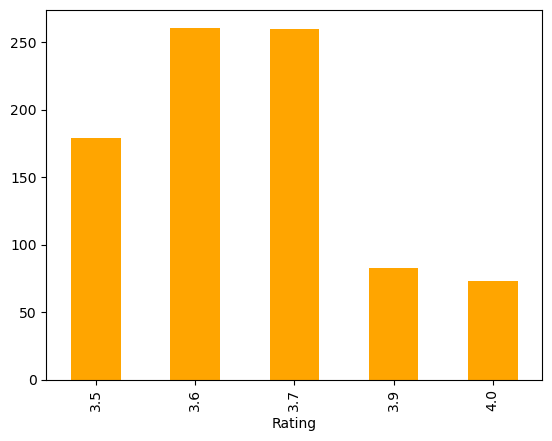

In [45]:
import matplotlib.pyplot as plt
total=df1_copy.groupby('Rating')['Discount'].sum()
print(total)
total.plot(kind='bar',color='orange')